In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow import keras
import numpy as np
# from sklearn.model_selection import train_test_split

# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
def build(input_shape, no_classes):
    model = models.Sequential()
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))
    ##
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))
    ##
    return model

In [6]:
model = build(x_train.shape[1:], 10)

In [7]:
# model.summary()

In [8]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
import time
##
convergence_accuracy_diff = 0.002
set_size = x_train.shape[0]
train_set_errors = []
test_set_errors = []
training_time_to_convergence = []
##########
for downsampling_ratio in range(2,21,2):
  sample_no = np.arange(set_size)
  sample_no = np.random.choice(sample_no, int(set_size/downsampling_ratio), replace=False)
  x_train_new = x_train[sample_no]
  y_train_new = y_train[sample_no]
  mean = np.mean(x_train_new,axis=(0,1,2,3))
  std = np.std(x_train_new,axis=(0,1,2,3))
  x_train_new = (x_train_new-mean)/(std+1e-7)
  x_test = (x_test-mean)/(std+1e-7)
  converge = False
  old_acc = 0
  num_epoch_to_converge = 0
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  train_error_curve = []
  test_error_curve = []
  train_time = 0
  start = time.time()
  while converge==False:
    num_epoch_to_converge += 1
    start = time.time()
    hist = model.fit(x_train_new, y_train_new, batch_size=64, epochs=1, verbose=1)
    end = time.time()
    train_time += (end - start)
    new_acc = hist.history['accuracy'][-1]
    if (new_acc - old_acc) < convergence_accuracy_diff:
      converge = True
    old_acc = new_acc
    new_train_error = (1 - new_acc)*100
    train_error_curve.append(new_train_error)
    ##
    _, new_test_accuracy = model.evaluate(x_test, y_test)
    new_test_error = (1 - new_test_accuracy)*100
    test_error_curve.append(new_test_error)
    ##
  train_set_errors.append(train_error_curve)
  test_set_errors.append(test_error_curve)
  training_time_to_convergence.append(train_time)

313/313 [==============================] - 1s 3ms/step - loss: 10.8112 - accuracy: 0.1000


In [11]:
import matplotlib.pyplot as plt

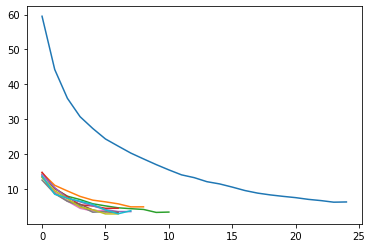

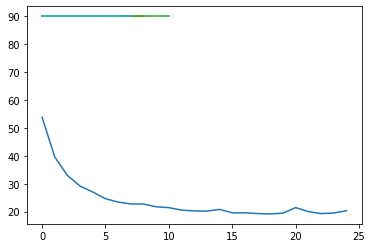

In [20]:
for y in train_set_errors:
  plt.plot(y)
plt.figure()
for y in test_set_errors:
  plt.plot(y)